In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import timeit
#import shap
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.model_selection import train_test_split

___

# Read-in and One-Hot Encoding

In [2]:
df1 = pd.read_excel("data_new/train.xlsx", sheet_name="positive_peak_time")
df2 = pd.read_excel("data_new/train.xlsx", sheet_name="negative_peak_time")
df3 = pd.read_excel("data_new/train.xlsx", sheet_name="arrival_time")
df4 = pd.read_excel("data_new/train.xlsx", sheet_name="positive_duration")
df5 = pd.read_excel("data_new/train.xlsx", sheet_name="negative_duration")
df6 = pd.read_excel("data_new/train.xlsx", sheet_name="positive_pressure")
df7 = pd.read_excel("data_new/train.xlsx", sheet_name="negative_pressure")
df8 = pd.read_excel("data_new/train.xlsx", sheet_name="positive_impulse")



dt1 = pd.read_excel("data_new/test.xlsx", sheet_name="positive_peak_time")
dt2 = pd.read_excel("data_new/test.xlsx", sheet_name="negative_peak_time")
dt3 = pd.read_excel("data_new/test.xlsx", sheet_name="arrival_time")
dt4 = pd.read_excel("data_new/test.xlsx", sheet_name="positive_duration")
dt5 = pd.read_excel("data_new/test.xlsx", sheet_name="negative_duration")
dt6 = pd.read_excel("data_new/test.xlsx", sheet_name="positive_pressure")
dt7 = pd.read_excel("data_new/test.xlsx", sheet_name="negative_pressure")
dt8 = pd.read_excel("data_new/test.xlsx", sheet_name="positive_impulse")

In [3]:
df1

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),Height of BLEVE (m),Tank Height with Gas (m),Vapour Temerature (K),Liquid Temerature (K),Status,Stand-off Distance,Target
0,B291,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,Superheated,5,0.012166
1,B291,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,Superheated,6,0.014556
2,B291,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,Superheated,7,0.017034
3,B291,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,Superheated,8,0.019576
4,B291,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,Superheated,9,0.022172
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21595,B103,30.7,0.181290,0.6,2.0,2.8,1.2,2.2,334.7,404.9,Subcooled,36,0.093782
21596,B103,30.7,0.181290,0.6,2.0,2.8,1.2,2.2,334.7,404.9,Subcooled,37,0.096635
21597,B103,30.7,0.181290,0.6,2.0,2.8,1.2,2.2,334.7,404.9,Subcooled,38,0.099487
21598,B103,30.7,0.181290,0.6,2.0,2.8,1.2,2.2,334.7,404.9,Subcooled,39,0.102341


In [4]:
dt1

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),Height of BLEVE (m),Tank Height with Gas (m),Vapour Temerature (K),Liquid Temerature (K),Status,Stand-off Distance,Target
0,P197,11.559040,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,Superheated,5,0.012114
1,P197,11.559040,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,Superheated,6,0.014798
2,P197,11.559040,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,Superheated,7,0.017533
3,P197,11.559040,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,Superheated,8,0.020293
4,P197,11.559040,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,Superheated,9,0.023077
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,P55,5.970915,0.284706,0.6,9.8,2.8,1.0,2.2,439.3,349.9,Superheated,36,0.091819
7196,P55,5.970915,0.284706,0.6,9.8,2.8,1.0,2.2,439.3,349.9,Superheated,37,0.094618
7197,P55,5.970915,0.284706,0.6,9.8,2.8,1.0,2.2,439.3,349.9,Superheated,38,0.097421
7198,P55,5.970915,0.284706,0.6,9.8,2.8,1.0,2.2,439.3,349.9,Superheated,39,0.100227


In [5]:
# Label encoding 'Status' feature into 0 and 1 
# 0 for Subcooled and 1 for Superheated

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

df5['Status'] = LE.fit_transform(df5['Status'])
dt5['Status'] = LE.fit_transform(dt5['Status'])

df5

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),Height of BLEVE (m),Tank Height with Gas (m),Vapour Temerature (K),Liquid Temerature (K),Status,Stand-off Distance,Target
0,B291,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,1,5,0.009827
1,B291,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,1,6,0.009906
2,B291,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,1,7,0.009970
3,B291,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,1,8,0.010039
4,B291,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,1,9,0.010011
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21595,B103,30.7,0.181290,0.6,2.0,2.8,1.2,2.2,334.7,404.9,0,36,0.017944
21596,B103,30.7,0.181290,0.6,2.0,2.8,1.2,2.2,334.7,404.9,0,37,0.017724
21597,B103,30.7,0.181290,0.6,2.0,2.8,1.2,2.2,334.7,404.9,0,38,0.017498
21598,B103,30.7,0.181290,0.6,2.0,2.8,1.2,2.2,334.7,404.9,0,39,0.017280


In [6]:
dt5.iloc[30:50,:]

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),Height of BLEVE (m),Tank Height with Gas (m),Vapour Temerature (K),Liquid Temerature (K),Status,Stand-off Distance,Target
30,P197,11.55904,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,1,35,0.015426
31,P197,11.55904,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,1,36,0.015341
32,P197,11.55904,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,1,37,0.015277
33,P197,11.55904,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,1,38,0.015224
34,P197,11.55904,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,1,39,0.015191
35,P197,11.55904,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,1,40,0.015170
36,P168,12.72223,0.648320,1.8,8.2,0.6,1.8,0.2,389.7,296.4,0,5,0.009043
37,P168,12.72223,0.648320,1.8,8.2,0.6,1.8,0.2,389.7,296.4,0,6,0.009390
38,P168,12.72223,0.648320,1.8,8.2,0.6,1.8,0.2,389.7,296.4,0,7,0.009452
39,P168,12.72223,0.648320,1.8,8.2,0.6,1.8,0.2,389.7,296.4,0,8,0.009528


In [7]:
X_traindf = df5.drop(['ID','Target'], axis=1)
X_testdf = dt5.drop(['ID','Target'], axis=1)

X_traindf

,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),Height of BLEVE (m),Tank Height with Gas (m),Vapour Temerature (K),Liquid Temerature (K),Status,Stand-off Distance
0,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,1,5
1,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,1,6
2,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,1,7
3,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,1,8
4,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,1,9
...,...,...,...,...,...,...,...,...,...,...,...
21595,30.7,0.181290,0.6,2.0,2.8,1.2,2.2,334.7,404.9,0,36
21596,30.7,0.181290,0.6,2.0,2.8,1.2,2.2,334.7,404.9,0,37
21597,30.7,0.181290,0.6,2.0,2.8,1.2,2.2,334.7,404.9,0,38
21598,30.7,0.181290,0.6,2.0,2.8,1.2,2.2,334.7,404.9,0,39


In [8]:
X_testdf

,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),Height of BLEVE (m),Tank Height with Gas (m),Vapour Temerature (K),Liquid Temerature (K),Status,Stand-off Distance
0,11.559040,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,1,5
1,11.559040,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,1,6
2,11.559040,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,1,7
3,11.559040,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,1,8
4,11.559040,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,1,9
...,...,...,...,...,...,...,...,...,...,...,...
7195,5.970915,0.284706,0.6,9.8,2.8,1.0,2.2,439.3,349.9,1,36
7196,5.970915,0.284706,0.6,9.8,2.8,1.0,2.2,439.3,349.9,1,37
7197,5.970915,0.284706,0.6,9.8,2.8,1.0,2.2,439.3,349.9,1,38
7198,5.970915,0.284706,0.6,9.8,2.8,1.0,2.2,439.3,349.9,1,39


In [9]:
y5_train = df5['Target']
y5_train

0        0.009827
1        0.009906
2        0.009970
3        0.010039
4        0.010011
           ...   
21595    0.017944
21596    0.017724
21597    0.017498
21598    0.017280
21599    0.017078
Name: Target, Length: 21600, dtype: float64

In [10]:
y1_train = df1['Target']
y2_train = df2['Target']
y3_train = df3['Target']
y4_train = df4['Target']
y6_train = df6['Target']
y7_train = df7['Target']
y8_train = df8['Target']

In [11]:
y1_test = dt1['Target']
y2_test = dt2['Target']
y3_test = dt3['Target']
y4_test = dt4['Target']
y5_test = dt5['Target']
y6_test = dt6['Target']
y7_test = dt7['Target']
y8_test = dt8['Target']

y1_test

0       0.012114
1       0.014798
2       0.017533
3       0.020293
4       0.023077
          ...   
7195    0.091819
7196    0.094618
7197    0.097421
7198    0.100227
7199    0.103035
Name: Target, Length: 7200, dtype: float64

In [12]:
y_train = np.concatenate((y1_train.values.reshape(-1,1), y2_train.values.reshape(-1,1), y3_train.values.reshape(-1,1), 
                          y4_train.values.reshape(-1,1), y5_train.values.reshape(-1,1), y6_train.values.reshape(-1,1),
                          y7_train.values.reshape(-1,1), y8_train.values.reshape(-1,1)), axis=1)

y_test = np.concatenate((y1_test.values.reshape(-1,1), y2_test.values.reshape(-1,1), y3_test.values.reshape(-1,1), 
                          y4_test.values.reshape(-1,1), y5_test.values.reshape(-1,1), y6_test.values.reshape(-1,1),
                          y7_test.values.reshape(-1,1), y8_test.values.reshape(-1,1)), axis=1)

In [13]:
print(y_train.shape)
print(y_test.shape)

y_train

(21600, 8)
(7200, 8)


array([[ 1.21663990e-02,  1.92270974e-02,  1.02530480e-02, ...,
         6.13340850e-01, -2.35990550e-01,  1.05453270e+02],
       [ 1.45556140e-02,  2.19475630e-02,  1.24416710e-02, ...,
         4.85479950e-01, -2.01730860e-01,  8.91907810e+01],
       [ 1.70337890e-02,  2.47348970e-02,  1.47326780e-02, ...,
         3.97631170e-01, -1.78507950e-01,  7.72377550e+01],
       ...,
       [ 9.94869250e-02,  1.13699184e-01,  9.45632310e-02, ...,
         6.88239110e-02, -4.64044960e-02,  2.74606420e+01],
       [ 1.02341190e-01,  1.16520062e-01,  9.73516780e-02, ...,
         6.64670090e-02, -4.60044180e-02,  2.67297230e+01],
       [ 1.05201100e-01,  1.19343956e-01,  1.00149770e-01, ...,
         6.42466250e-02, -4.48966060e-02,  2.60354210e+01]])

In [14]:
y_test

array([[ 1.21143940e-02,  2.36260840e-02,  9.64583550e-03, ...,
         2.50615600e-01, -1.13256240e-01,  5.26190380e+01],
       [ 1.47982630e-02,  2.66367886e-02,  1.20925640e-02, ...,
         2.00786950e-01, -1.03320270e-01,  4.60554850e+01],
       [ 1.75325390e-02,  2.95875370e-02,  1.46107920e-02, ...,
         1.66701170e-01, -9.43374630e-02,  4.11314200e+01],
       ...,
       [ 9.74210350e-02,  1.11182812e-01,  9.28768070e-02, ...,
         9.06703620e-02, -5.40905860e-02,  3.56521530e+01],
       [ 1.00227500e-01,  1.14051970e-01,  9.56180690e-02, ...,
         8.74992310e-02, -5.23571000e-02,  3.46799510e+01],
       [ 1.03034510e-01,  1.16930324e-01,  9.83653590e-02, ...,
         8.45144470e-02, -5.04742410e-02,  3.37590220e+01]])

___

# Standardization and Power Transform

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer

In [16]:
# Processing both X_train and X_test using standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_traindf)
X_test = scaler.transform(X_testdf)

In [17]:
# Double check if it succeeded
# df_stdscal = pd.DataFrame(X_train)
# df_stdscal.hist(figsize = (20,20), bins=10)

In [18]:
quantile = QuantileTransformer(output_distribution='normal')

y_train_normal = quantile.fit_transform(y_train)
y_test_normal = quantile.transform(y_test)

In [19]:
y_test_normal[1:41, 7]

array([-0.13282937, -0.24046414, -0.33752546, -0.42328697, -0.50113971,
       -0.56880009, -0.6374526 , -0.6996398 , -0.75546111, -0.80519565,
       -0.85363159, -0.89909811, -0.94159534, -0.97887334, -1.01505231,
       -1.0521215 , -1.08724264, -1.12069735, -1.15449619, -1.18573499,
       -1.21596976, -1.2436481 , -1.27113591, -1.29845258, -1.32647432,
       -1.35388867, -1.37806628, -1.40604031, -1.43284272, -1.45727479,
       -1.48291819, -1.50498221, -1.53121516, -1.55699008, -1.57938197,
        0.45279688,  0.32077739,  0.19759081,  0.08977174, -0.00920681])

In [20]:
y_test_check = quantile.inverse_transform(y_test_normal)
y_test_check[1:41,7]

array([46.055485, 41.13142 , 37.34763 , 34.215847, 31.660479, 29.51226 ,
       27.62623 , 25.996059, 24.593987, 23.341728, 22.203737, 21.178555,
       20.26375 , 19.439846, 18.682037, 17.977852, 17.324688, 16.722097,
       16.167007, 15.652895, 15.172283, 14.719731, 14.292322, 13.888784,
       13.508397, 13.149973, 12.811902, 12.492044, 12.188312, 11.898917,
       11.622511, 11.358176, 11.105268, 10.863276, 10.631696, 83.744408,
       73.62957 , 65.149193, 58.173275, 52.403481])

In [21]:
y_test[1:41,7]

array([46.055485, 41.13142 , 37.34763 , 34.215847, 31.660479, 29.51226 ,
       27.62623 , 25.996059, 24.593987, 23.341728, 22.203737, 21.178555,
       20.26375 , 19.439846, 18.682037, 17.977852, 17.324688, 16.722097,
       16.167007, 15.652895, 15.172283, 14.719731, 14.292322, 13.888784,
       13.508397, 13.149973, 12.811902, 12.492044, 12.188312, 11.898917,
       11.622511, 11.358176, 11.105268, 10.863276, 10.631696, 83.744408,
       73.62957 , 65.149193, 58.173275, 52.403481])

In [22]:
# Double check if it succeeded
# df_stdscal = pd.DataFrame(y_train)
# df_stdscal.hist(figsize = (20,20), bins=10)

___

# ANN

In [23]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

torch.backends.cudnn.version() , torch.backends.cudnn.enabled

(8500, True)

In [24]:
# convert data to torch.FloatTensor
X_train_torch = torch.from_numpy(X_train.astype(np.float32))
X_test_torch = torch.from_numpy(X_test.astype(np.float32))



y_train_torch = torch.from_numpy(y_train_normal.astype(np.float32))
y_test_torch = torch.from_numpy(y_test_normal.astype(np.float32))


print(X_train_torch)

tensor([[-0.8024,  0.7595, -0.9898,  ...,  0.6962,  1.3190, -1.6846],
        [-0.8024,  0.7595, -0.9898,  ...,  0.6962,  1.3190, -1.5883],
        [-0.8024,  0.7595, -0.9898,  ...,  0.6962,  1.3190, -1.4921],
        ...,
        [ 0.9096, -1.3719, -1.5129,  ...,  1.5587, -0.7582,  1.4921],
        [ 0.9096, -1.3719, -1.5129,  ...,  1.5587, -0.7582,  1.5883],
        [ 0.9096, -1.3719, -1.5129,  ...,  1.5587, -0.7582,  1.6846]])


In [25]:
y_train_torch

tensor([[-1.8878, -2.6412, -1.8978,  ...,  1.3802, -1.4426,  0.6927],
        [-1.5732, -2.1187, -1.5748,  ...,  1.1909, -1.2257,  0.5174],
        [-1.3570, -1.7601, -1.3660,  ...,  1.0275, -1.0601,  0.3689],
        ...,
        [ 1.4216,  1.3089,  1.4319,  ..., -0.7408,  0.7991, -0.6441],
        [ 1.6162,  1.4910,  1.6337,  ..., -0.7787,  0.8107, -0.6733],
        [ 1.8511,  1.7361,  1.8826,  ..., -0.8198,  0.8473, -0.6979]])

In [26]:
y_test_torch

tensor([[-1.8947, -1.8800, -2.0452,  ...,  0.6301, -0.4754, -0.0063],
        [-1.5462, -1.5752, -1.6165,  ...,  0.4224, -0.3520, -0.1328],
        [-1.3203, -1.3580, -1.3736,  ...,  0.2338, -0.2298, -0.2405],
        ...,
        [ 1.3003,  1.1768,  1.3228,  ..., -0.4314,  0.5893, -0.3827],
        [ 1.4655,  1.3283,  1.4963,  ..., -0.4692,  0.6343, -0.4098],
        [ 1.6633,  1.5193,  1.7074,  ..., -0.5085,  0.6895, -0.4363]])

In [27]:
train_data = []
for i in range(len(X_train_torch)):
   train_data.append([X_train_torch[i],
                      y_train_torch[i] 
                     ])

test_data = []
for i in range(len(X_test_torch)):
   test_data.append([X_test_torch[i], 
                     y_test_torch[i]
                     ])


# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=512,               # batch_size could be smaller
    num_workers=0)                                                                   # Increasing num_workers slow down the training because it does not use GPU at all
test_loader = torch.utils.data.DataLoader(test_data, batch_size=512,
    num_workers=0)

In [28]:
for x,y in train_loader:
    print(y)
    # break

tensor([[-1.8878, -2.6412, -1.8978,  ...,  1.3802, -1.4426,  0.6927],
        [-1.5732, -2.1187, -1.5748,  ...,  1.1909, -1.2257,  0.5174],
        [-1.3570, -1.7601, -1.3660,  ...,  1.0275, -1.0601,  0.3689],
        ...,
        [-0.9979, -1.0126, -1.0149,  ...,  0.4693, -0.6818,  0.2249],
        [-0.8830, -0.8911, -0.8996,  ...,  0.3513, -0.6417,  0.1510],
        [-0.7784, -0.7775, -0.7954,  ...,  0.2407, -0.5527,  0.0837]])
tensor([[-0.6820, -0.6862, -0.6977,  ...,  0.1379, -0.4179,  0.0224],
        [-0.5917, -0.6010, -0.6080,  ...,  0.0406, -0.3576, -0.0370],
        [-0.5070, -0.5145, -0.5230,  ..., -0.0512, -0.3485, -0.0875],
        ...,
        [-0.1655, -0.3644, -0.1926,  ..., -1.4773,  1.3318, -1.6337],
        [-0.0918, -0.2905, -0.1186,  ..., -1.5434,  1.3688, -1.6855],
        [-0.0192, -0.2167, -0.0458,  ..., -1.6069,  1.4008, -1.7329]])
tensor([[ 5.3093e-02, -1.4326e-01,  2.6921e-02,  ..., -1.6665e+00,
          1.4558e+00, -1.7748e+00],
        [ 1.2589e-01, -7.2220

In [29]:
## Define the NN architecture
## NN with 3 hidden layer, s=[26, 256, 256, 256, 128, 8]

class BleveNet(nn.Module):
    def __init__(self):
        super(BleveNet, self).__init__()
        # The first hidden layer has 256 neurons
        self.fc1 = nn.Linear(X_train_torch.shape[1], 256)
        # The second hidden layer has 256 neurons
        self.fc2 = nn.Linear(256, 256)
        # The third hidden layer has 256 neurons
        self.fc3 = nn.Linear(256, 256)
        # The fourth layer has 128 output neurons
        self.fc4 = nn.Linear(256, 128)
        # The final layer has 8 output neurons
        self.fc5 = nn.Linear(128, 8)


        # Define proportion or neurons to dropout
        self.dropout = nn.Dropout(0.1)

        # Mish activation
        self.mish = nn.Mish()


    def forward(self, x):
        # add first fully connected layer
        x = self.fc1(x)
        x = self.mish(x)
        x = self.dropout(x)
        # add second fully connected layer
        x = self.fc2(x)
        x = self.mish(x)
        x = self.dropout(x)
        # add third fully connected layer
        x = self.fc3(x)
        x = self.mish(x)
        x = self.dropout(x)
        # add fourth fully connected layers
        x = self.fc4(x)
        x = self.mish(x)
        x = self.dropout(x)

        # add final output layers:
        output = self.fc5(x)
       
        return output

# initialize the NN
model = BleveNet()
print(model)

BleveNet(
  (fc1): Linear(in_features=11, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=128, bias=True)
  (fc5): Linear(in_features=128, out_features=8, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (mish): Mish()
)


In [30]:
criterion = nn.HuberLoss()        # This is the best loss function for my model
# criterion = nn.MSELoss()


optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=1e-5)     # This is the best optimizer for my model 

# Check for GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [31]:
n_epochs = 500 

model.to(device)    # bring the model to gpu
model.train()       # prep model for training

train_losses = []
for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        #bring data and target to gpu
        data, target = data.to(device), target.to(device)
        
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
        
    # print training statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.dataset)
    train_losses.append(train_loss)

    print('Epoch: {}/{} \tTraining Loss: {:.6f}'.format(
        epoch+1,
        n_epochs, 
        train_loss
        ))

Epoch: 1/500 	Training Loss: 0.116054
Epoch: 2/500 	Training Loss: 0.050513
Epoch: 3/500 	Training Loss: 0.038355
Epoch: 4/500 	Training Loss: 0.033127
Epoch: 5/500 	Training Loss: 0.029307
Epoch: 6/500 	Training Loss: 0.027199
Epoch: 7/500 	Training Loss: 0.024626
Epoch: 8/500 	Training Loss: 0.027118
Epoch: 9/500 	Training Loss: 0.024726
Epoch: 10/500 	Training Loss: 0.027207
Epoch: 11/500 	Training Loss: 0.022710
Epoch: 12/500 	Training Loss: 0.021458
Epoch: 13/500 	Training Loss: 0.021113
Epoch: 14/500 	Training Loss: 0.023813
Epoch: 15/500 	Training Loss: 0.021378
Epoch: 16/500 	Training Loss: 0.026396
Epoch: 17/500 	Training Loss: 0.031130
Epoch: 18/500 	Training Loss: 0.029562
Epoch: 19/500 	Training Loss: 0.022414
Epoch: 20/500 	Training Loss: 0.021940
Epoch: 21/500 	Training Loss: 0.022012
Epoch: 22/500 	Training Loss: 0.026254
Epoch: 23/500 	Training Loss: 0.026147
Epoch: 24/500 	Training Loss: 0.020243
Epoch: 25/500 	Training Loss: 0.016966
Epoch: 26/500 	Training Loss: 0.01

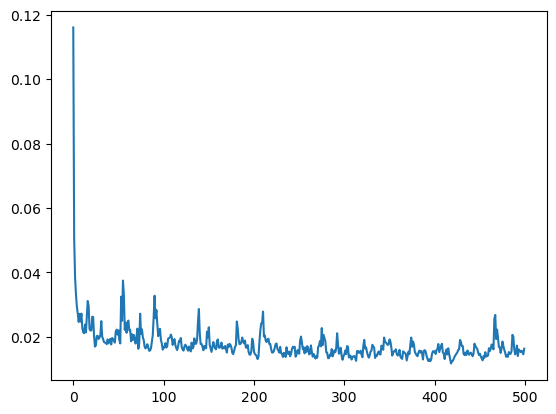

In [32]:
plt.plot(train_losses)

# Save the model  -- I already saved this and submitted
torch.save(model.state_dict(), 'PyTorch_Model/Multiclass_NN_mish_Drop_L2_Huber_500Epochs.pt')

**Loading the saved state**

In [33]:
model.load_state_dict(torch.load('PyTorch_Model/Multiclass_NN_mish_Drop_L2_Huber_500Epochs.pt', map_location=torch.device('cpu')))

model.eval()           # prep model for *evaluation*
model.to(device)
with torch.no_grad():  # turn off gradient to save memory
    y_predNN_torch = model(X_test_torch.to(device))

y_predNN_normal = y_predNN_torch.cpu().numpy()     # convert to numpy array
y_test_normal = y_test_torch.cpu().numpy()
print(y_predNN_normal)

[[-1.7392809  -1.9917363  -1.8193882  ...  0.35119608 -0.39305842
  -0.21628276]
 [-1.5200003  -1.7321391  -1.5883858  ...  0.25510928 -0.32279378
  -0.2683021 ]
 [-1.3420023  -1.5194428  -1.4016576  ...  0.15427521 -0.24441741
  -0.32641724]
 ...
 [ 1.2999079   1.1495788   1.3066216  ... -0.6442714   0.710945
  -0.6070192 ]
 [ 1.4580866   1.2939442   1.468566   ... -0.69298196  0.7492833
  -0.63979334]
 [ 1.6404264   1.4652623   1.6569393  ... -0.74391663  0.78656
  -0.6731756 ]]


In [34]:
mape = mean_absolute_percentage_error(y_test_normal, y_predNN_normal)
r2 = r2_score(y_test_normal, y_predNN_normal)
print(f"Neural Network scores in normal distribution: r2 = {r2}, mape = {mape}")

Neural Network scores in normal distribution: r2 = 0.9603648674823635, mape = 0.9123709797859192


In [35]:
y_predNN = quantile.inverse_transform(y_predNN_normal)
mape = mean_absolute_percentage_error(y_test, y_predNN.astype('float64'))
r2 = r2_score(y_test, y_predNN)

print(f"Neural Network scores in actual distribution: r2 = {r2}, mape = {mape}")

Neural Network scores in actual distribution: r2 = 0.9592284583532196, mape = 0.08364320607261552


In [36]:
y_predNN[1:41,7]

array([39.990974, 37.694412, 35.120922, 32.259705, 29.518648, 27.633831,
       26.295216, 25.328756, 24.663584, 24.181011, 23.81377 , 23.411663,
       23.016758, 22.492844, 21.927814, 21.298244, 20.605316, 19.832489,
       19.048626, 18.303392, 17.591423, 16.89375 , 16.218763, 15.531129,
       14.848038, 14.200279, 13.674687, 13.206299, 12.831106, 12.541457,
       12.272652, 12.02084 , 11.772506, 11.490342, 11.118927, 82.8921  ,
       76.16895 , 68.8919  , 61.497734, 55.746334], dtype=float32)

In [37]:
y_test[1:41,7]

array([46.055485, 41.13142 , 37.34763 , 34.215847, 31.660479, 29.51226 ,
       27.62623 , 25.996059, 24.593987, 23.341728, 22.203737, 21.178555,
       20.26375 , 19.439846, 18.682037, 17.977852, 17.324688, 16.722097,
       16.167007, 15.652895, 15.172283, 14.719731, 14.292322, 13.888784,
       13.508397, 13.149973, 12.811902, 12.492044, 12.188312, 11.898917,
       11.622511, 11.358176, 11.105268, 10.863276, 10.631696, 83.744408,
       73.62957 , 65.149193, 58.173275, 52.403481])

In [38]:
y_test

array([[ 1.21143940e-02,  2.36260840e-02,  9.64583550e-03, ...,
         2.50615600e-01, -1.13256240e-01,  5.26190380e+01],
       [ 1.47982630e-02,  2.66367886e-02,  1.20925640e-02, ...,
         2.00786950e-01, -1.03320270e-01,  4.60554850e+01],
       [ 1.75325390e-02,  2.95875370e-02,  1.46107920e-02, ...,
         1.66701170e-01, -9.43374630e-02,  4.11314200e+01],
       ...,
       [ 9.74210350e-02,  1.11182812e-01,  9.28768070e-02, ...,
         9.06703620e-02, -5.40905860e-02,  3.56521530e+01],
       [ 1.00227500e-01,  1.14051970e-01,  9.56180690e-02, ...,
         8.74992310e-02, -5.23571000e-02,  3.46799510e+01],
       [ 1.03034510e-01,  1.16930324e-01,  9.83653590e-02, ...,
         8.45144470e-02, -5.04742410e-02,  3.37590220e+01]])

In [39]:
# Positive Impulse
print("Positive Pressure")
print(y_predNN[:,5])
print()

# Negative Pressure
print("Negative Pressure")
print(y_predNN[1010:1020,6])
print()


# Positive Impulse
print("Positive Impulse")
print(y_predNN[:10,7])

Positive Pressure
[0.18686691 0.16998251 0.15439068 ... 0.07497399 0.07170546 0.06859732]

Negative Pressure
[-0.11643808 -0.10752033 -0.09846211 -0.09056465 -0.08386255 -0.0777927
 -0.072277   -0.06794819 -0.06416631 -0.06058231]

Positive Impulse
[42.247078 39.990974 37.694412 35.120922 32.259705 29.518648 27.633831
 26.295216 25.328756 24.663584]


___

# Positive Peak Time

In [40]:
mape = mean_absolute_percentage_error(y_test[:,0], y_predNN[:,0])
r2 = r2_score(y_test[:,0], y_predNN[:,0])
rmse = np.sqrt(mean_squared_error(y_test[:,0], y_predNN[:,0]))


print(f"Scores in actual distribution for arrival time: r2 = {r2}, mape = {mape}, rmse = {rmse}")

Scores in actual distribution for arrival time: r2 = 0.9954032549784757, mape = 0.0315407670771008, rmse = 0.0019472120292065415


____

# Negative Peak Time

In [41]:
mape = mean_absolute_percentage_error(y_test[:,1], y_predNN[:,1])
r2 = r2_score(y_test[:,1], y_predNN[:,1])
rmse = np.sqrt(mean_squared_error(y_test[:,1], y_predNN[:,1]))


print(f"Scores in actual distribution for arrival time: r2 = {r2}, mape = {mape}, rmse = {rmse}")

Scores in actual distribution for arrival time: r2 = 0.9919365824456913, mape = 0.03680670409013907, rmse = 0.0026807592096860654


___

# Arrival Time

In [42]:
mape = mean_absolute_percentage_error(y_test[:,2], y_predNN[:,2])
r2 = r2_score(y_test[:,2], y_predNN[:,2])
rmse = np.sqrt(mean_squared_error(y_test[:,2], y_predNN[:,2]))


print(f"Scores in actual distribution for arrival time: r2 = {r2}, mape = {mape}, rmse = {rmse}")

Scores in actual distribution for arrival time: r2 = 0.9957003351149657, mape = 0.034762934390513714, rmse = 0.0018177980686660516


___

# Positive Duration

In [43]:
mape = mean_absolute_percentage_error(y_test[:,3], y_predNN[:,3])
r2 = r2_score(y_test[:,3], y_predNN[:,3])
rmse = np.sqrt(mean_squared_error(y_test[:,4], y_predNN[:,3]))


print(f"Scores in actual distribution for arrival time: r2 = {r2}, mape = {mape}, rmse = {rmse}")

Scores in actual distribution for arrival time: r2 = 0.9178151331381783, mape = 0.055868739725255696, rmse = 0.008326877258484851


___

# Negative Duration

In [44]:
mape = mean_absolute_percentage_error(y_test[:,4], y_predNN[:,4])
r2 = r2_score(y_test[:,4], y_predNN[:,4])
rmse = np.sqrt(mean_squared_error(y_test[:,4], y_predNN[:,4]))


print(f"Scores in actual distribution for arrival time: r2 = {r2}, mape = {mape}, rmse = {rmse}")

Scores in actual distribution for arrival time: r2 = 0.9154361324122297, mape = 0.08104769187904591, rmse = 0.00183052247246474


In [45]:
y_test[100:120, 4]

array([0.0070927 , 0.00708828, 0.00709008, 0.0070853 , 0.00707912,
       0.00706785, 0.00706412, 0.00704504, 0.00988789, 0.01012937,
       0.01037642, 0.01030135, 0.01078974, 0.01087129, 0.0107311 ,
       0.01087087, 0.01152926, 0.0117134 , 0.01242085, 0.01263455])

In [46]:
y_predNN[100:120, 4]

array([0.01056505, 0.01052264, 0.01047505, 0.0104239 , 0.01037724,
       0.01032534, 0.01029657, 0.01030937, 0.01064512, 0.0106506 ,
       0.01075534, 0.01086623, 0.01097928, 0.01111607, 0.01123187,
       0.01135368, 0.01146767, 0.01156835, 0.01166335, 0.01175111],
      dtype=float32)

___

# Positive Pressure

In [47]:
mape = mean_absolute_percentage_error(y_test[:,5], y_predNN[:,5])
r2 = r2_score(y_test[:,5], y_predNN[:,5])
rmse = np.sqrt(mean_squared_error(y_test[:,5], y_predNN[:,5]))


print(f"Scores in actual distribution for arrival time: r2 = {r2}, mape = {mape}, rmse = {rmse}")

Scores in actual distribution for arrival time: r2 = 0.9770077199104891, mape = 0.14746371332386893, rmse = 0.05060704632937593


In [48]:
y_test[:,5]

array([0.2506156 , 0.20078695, 0.16670117, ..., 0.09067036, 0.08749923,
       0.08451445])

In [49]:
y_predNN[:,5]

array([0.18686691, 0.16998251, 0.15439068, ..., 0.07497399, 0.07170546,
       0.06859732], dtype=float32)

___

# Negative Pressure

In [50]:
mape = mean_absolute_percentage_error(y_test[:,6], y_predNN[:,6])
r2 = r2_score(y_test[:,6], y_predNN[:,6])
rmse = np.sqrt(mean_squared_error(y_test[:,6], y_predNN[:,6]))


print(f"Scores in actual distribution for arrival time: r2 = {r2}, mape = {mape}, rmse = {rmse}")

Scores in actual distribution for arrival time: r2 = 0.962559627176625, mape = 0.11060200905315168, rmse = 0.015175398734788957


In [51]:
y_test[1010:1020, 6]

array([-0.13921224, -0.13253026, -0.12156035, -0.10836691, -0.09683013,
       -0.09476076, -0.09015154, -0.08397743, -0.07669979, -0.06937373])

In [52]:
y_predNN[1010:1020, 6]

array([-0.11643808, -0.10752033, -0.09846211, -0.09056465, -0.08386255,
       -0.0777927 , -0.072277  , -0.06794819, -0.06416631, -0.06058231],
      dtype=float32)

____

# Positive Impulse

In [53]:
mape = mean_absolute_percentage_error(y_test[:,7], y_predNN[:,7])
r2 = r2_score(y_test[:,7], y_predNN[:,7])
rmse = np.sqrt(mean_squared_error(y_test[:,7], y_predNN[:,7]))


print(f"Scores in actual distribution for arrival time: r2 = {r2}, mape = {mape}, rmse = {rmse}")

Scores in actual distribution for arrival time: r2 = 0.9179688816491016, mape = 0.1710530890418475, rmse = 28.91891723519466


In [54]:
y_test[:,7]

array([52.619038, 46.055485, 41.13142 , ..., 35.652153, 34.679951,
       33.759022])

In [55]:
y_predNN[:,7]

array([42.247078, 39.990974, 37.694412, ..., 28.461514, 27.560621,
       26.731874], dtype=float32)